**Общая информация**

**Срок сдачи:** 16 марта 2020, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [16]:
import sklearn

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [18]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
from sklearn.neighbors import KDTree
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors=5, algorithm='brute', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X):
        if self.algorithm == 'brute':
            prediction = np.empty(X.shape[0])
            distances = pairwise_distances(X, self.X, self.metric)
            for i in range(X.shape[0]):
                tmp_y = np.take(self.y, np.argsort(distances[i])[:self.n_neighbors])
                prediction[i] = np.argmax(np.bincount(tmp_y.astype(int)))
            return prediction.astype(int)
        elif self.algorithm == 'kd_tree':
            tree = KDTree(self.X)
            prediction = np.empty(X.shape[0])
            new_X = np.concatenate((X, self.X), axis=0)
            for i in range(X.shape[0]):
                _, ind = tree.query(np.asarray([X[i]]), k=self.n_neighbors)
                prediction[i] = np.argmax(np.bincount(np.take(self.y, np.asarray(ind.flatten(), dtype=int))))
            prediction = prediction.astype(int)
            return prediction

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [15]:
iris = datasets.load_iris()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [27]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [28]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"
my_clf_pred, sklearn_pred

(array([2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1]),
 array([2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1]))

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [207]:
%time clf.fit(X_train, y_train)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 1.2 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [208]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.8 µs


In [209]:
%time clf.predict(X_test)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 5.38 ms


array([0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2])

In [210]:
%time my_clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.37 ms


array([0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2])

###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [211]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [212]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [213]:
%time clf.fit(X_train, y_train)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 1.12 ms


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [214]:
%time my_clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21.5 µs


In [215]:
%time clf.predict(X_test)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.54 ms


array([1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0])

In [216]:
%time my_clf.predict(X_test)

CPU times: user 15.6 ms, sys: 15.6 ms, total: 31.2 ms
Wall time: 4.38 ms


array([1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0])

In [217]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"
sklearn_pred, my_clf_pred

(array([1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0]),
 array([1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0]))

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [19]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [20]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(data)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [22]:
from sklearn.model_selection import KFold

In [35]:
kf = KFold(n_splits=3)
myknn = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')
scores = []
for train_index, val_index in kf.split(vectors):
    data_train, data_val = vectors[train_index], vectors[val_index]
    myknn.fit(data_train, target[train_index])
    pred = myknn.predict(data_val)
    acc = accuracy_score(pred, target[val_index])
    print('accuracy is: ', acc)
    scores.append(acc/3)
print('mean accuracy among all folds: ', sum(scores))

accuracy is:  0.19034994697773064
accuracy is:  0.19066560594006896
accuracy is:  0.18164942985945373
mean accuracy among all fold:  0.18755499425908445


Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [37]:
def find_best_n(metric='euclidean'):
    scores1 = []
    for n_neighbors in range(1, 11):
        kf = KFold(n_splits=3)
        myknn = MyKNeighborsClassifier(n_neighbors=n_neighbors, algorithm='brute', metric=metric)
        scores = []
        for train_index, val_index in kf.split(vectors):
            data_train, data_val = vectors[train_index], vectors[val_index]
            myknn.fit(data_train, target[train_index])
            pred = myknn.predict(data_val)
            acc = accuracy_score(pred, target[val_index])
            scores.append(acc/3)
        scores = sum(scores)
        scores1.append(scores)
        print('mean accuracy among all folds: ', scores)
    return scores1

In [54]:
scores1 = find_best_n()

mean accuracy among all folds:  0.20850286820809477
mean accuracy among all folds:  0.18755499425908445
mean accuracy among all folds:  0.18463862883933393
mean accuracy among all folds:  0.18092664816862966
mean accuracy among all folds:  0.1834013722517634
mean accuracy among all folds:  0.1829595434413754
mean accuracy among all folds:  0.18499239184567834
mean accuracy among all folds:  0.18649499412222859
mean accuracy among all folds:  0.18941175792374298
mean accuracy among all folds:  0.1913560952737956


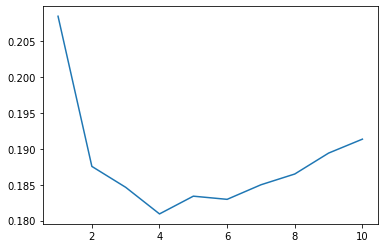

In [55]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), scores1)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Косинусная:

mean accuracy among all folds:  0.29238085971534544
mean accuracy among all folds:  0.27205146173768124
mean accuracy among all folds:  0.2686929159942217
mean accuracy among all folds:  0.26542257666013414
mean accuracy among all folds:  0.2625946988604126
mean accuracy among all folds:  0.2581754733876764
mean accuracy among all folds:  0.25799856845028274
mean accuracy among all folds:  0.2555238912355918
mean accuracy among all folds:  0.2529606560982078
mean accuracy among all folds:  0.2471273862716144


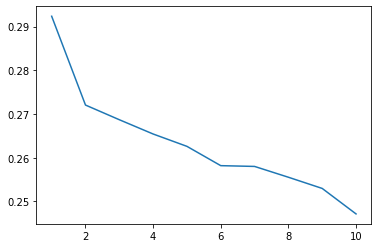

In [53]:
scores2 = find_best_n(metric='cosine')
plt.plot(range(1,11), scores2)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data)

Используем tf-idf и евклидово расстояние

mean accuracy among all folds:  0.15078630249136707
mean accuracy among all folds:  0.11446000195535141
mean accuracy among all folds:  0.10738910059364506
mean accuracy among all folds:  0.1020858659868118
mean accuracy among all folds:  0.09987594860556541
mean accuracy among all folds:  0.09634070883270487
mean accuracy among all folds:  0.09262863442511496
mean accuracy among all folds:  0.08918141358785522
mean accuracy among all folds:  0.08635306710370552
mean accuracy among all folds:  0.08378980853210005


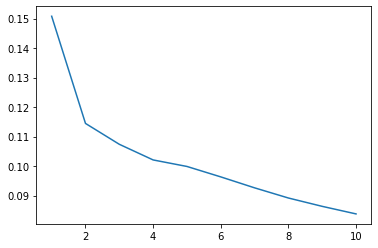

In [58]:
scores3 = find_best_n(metric='euclidean')
plt.plot(range(1,11), scores3)

Используем tf-idf и косинусное расстояние

mean accuracy among all folds:  0.5958995830489591
mean accuracy among all folds:  0.5565659688799164
mean accuracy among all folds:  0.5654933995640673
mean accuracy among all folds:  0.5708848874487154
mean accuracy among all folds:  0.5713272318119743
mean accuracy among all folds:  0.5687637857665976
mean accuracy among all folds:  0.5690291548897988
mean accuracy among all folds:  0.5671731176860038
mean accuracy among all folds:  0.5676149464963917
mean accuracy among all folds:  0.5671733520282178


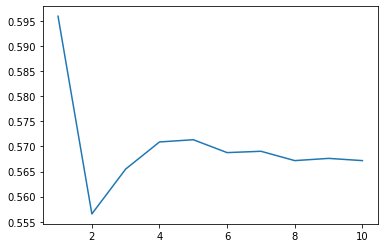

In [37]:
scores4 = find_best_n(metric='cosine')
plt.plot(range(1,11), scores4)

Вывод: лучше всего - это tf-idf с косинусным расстоянием и числом соседей равным 1

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [28]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [29]:
data_test = newsgroups['data']
target_test = newsgroups['target']

In [30]:
vectorizer1 = TfidfVectorizer()
vectors1 = vectorizer1.fit_transform(data)

In [31]:
vectorizer2 = TfidfVectorizer(vocabulary=vectorizer1.get_feature_names())
vectors2 = vectorizer2.fit_transform(data_test)

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [34]:
myknn = MyKNeighborsClassifier(n_neighbors=1, metric='cosine')
myknn.fit(vectors1, target)

In [35]:
pred = myknn.predict(vectors2)
print(accuracy_score(pred, target_test))

0.5047796070100903


Результат на тестовой выборке хуже чем на валидационной, что может быть связано с тем, что параметр количества соседей не оптимален для тестовой выборки, но оптимален для валидационной, а также, что пришлось взять для тестовой выборки словарь от тренировочной, что требовалось для подсчета расстояний